In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
sns.set(font_scale=1, style="whitegrid")

print('Environment set')

Environment set


In [2]:
df_activity = pd.read_csv('dailyActivity_merged.csv')
df_intensity = pd.read_csv('hourlyIntensities_merged.csv')
df_sleep = pd.read_csv('sleepDay_merged.csv')

In [3]:
df_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [4]:
df_intensity.head()

,Id,ActivityHour,TotalIntensity,AverageIntensity
0,1503960366,4/12/2016 12:00:00 AM,20,0.333333
1,1503960366,4/12/2016 1:00:00 AM,8,0.133333
2,1503960366,4/12/2016 2:00:00 AM,7,0.116667
3,1503960366,4/12/2016 3:00:00 AM,0,0.000000
4,1503960366,4/12/2016 4:00:00 AM,0,0.000000


In [5]:
df_sleep.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [6]:
def unique_id(df) :
    id_count = df_activity.iloc[:,0].value_counts().count()
    return print ('There are ' + str(id_count) + ' unique IDs')
unique_id(df_activity)
unique_id(df_sleep)
unique_id(df_intensity)

There are 33 unique IDs
There are 33 unique IDs
There are 33 unique IDs


In [7]:
def date_range(df) :
    min_date = df_activity.iloc[:,1].min()
    max_date = df_activity.iloc[:,1].max()
    return print('This dataframe includes records from ' + str(min_date) + ' to ' + str(max_date))

date_range(df_activity)
date_range(df_intensity)
date_range(df_sleep)

This dataframe includes records from 4/12/2016 to 5/9/2016
This dataframe includes records from 4/12/2016 to 5/9/2016
This dataframe includes records from 4/12/2016 to 5/9/2016


In [8]:
df_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [9]:
df_activity.ActivityDate = pd.to_datetime(df_activity.ActivityDate, errors='coerce')
df_intensity.ActivityHour = pd.to_datetime(df_intensity.ActivityHour, errors='coerce')
df_sleep.SleepDay = pd.to_datetime(df_sleep.SleepDay, errors='coerce')

C:\Users\Baraa Ehab\AppData\Local\Temp\ipykernel_10296\930070666.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_intensity.ActivityHour = pd.to_datetime(df_intensity.ActivityHour, errors='coerce')
C:\Users\Baraa Ehab\AppData\Local\Temp\ipykernel_10296\930070666.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_sleep.SleepDay = pd.to_datetime(df_sleep.SleepDay, errors='coerce')


In [10]:
def dupe_rows(df) :
    dupe = df.duplicated().sum()
    if dupe > 1:
        return print('There are ' + str(dupe) + ' duplicated rows')
    elif dupe == 1:
        return print('There is ' + str(dupe) + ' duplicated row')
    else:
        return print('There are no duplicated rows')
    
dupe_rows(df_activity)
dupe_rows(df_intensity)
dupe_rows(df_sleep)

There are no duplicated rows
There are no duplicated rows
There are 3 duplicated rows


In [11]:
df_sleep.loc[df_sleep.duplicated(),:]

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
161,4388161847,2016-05-05,1,471,495
223,4702921684,2016-05-07,1,520,543
380,8378563200,2016-04-25,1,388,402


In [12]:
df_sleep.duplicated().sum() / len(df_sleep.index) * 100

0.7263922518159807

In [13]:
df_sleep2 = df_sleep.drop_duplicates()

In [14]:
def dupe_val(df, col_indices) :
    indices = df.iloc[:,col_indices].columns
    dupe = df.duplicated(subset = indices).sum()
    if dupe > 1:
        return print('There are ' + str(dupe) + ' duplicated values')
    elif dupe == 1:
        return print('There is' + str(dupe) + ' duplicated value')
    else:
        return print('There are no duplicated values')

dupe_val(df_activity, [0,1])
dupe_val(df_intensity, [0,1])
dupe_val(df_sleep2, [0,1])

There are no duplicated values
There are no duplicated values
There are no duplicated values


In [15]:
df_activity.describe()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,2016-04-26 06:53:37.021276672,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
min,1.503960e+09,2016-04-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,2016-04-19 00:00:00,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,2016-04-26 00:00:00,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,2016-05-04 00:00:00,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,2016-05-12 00:00:00,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000
std,2.424805e+09,NaN,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862


<Axes: title={'center': 'Average Intensity of Activity'}>

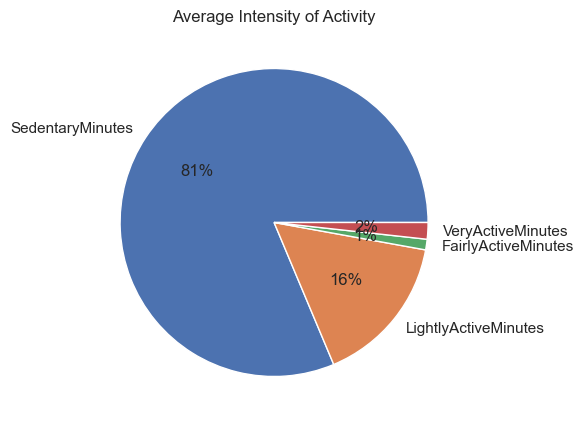

In [18]:
activity = df_activity.loc[:,['SedentaryMinutes','LightlyActiveMinutes', \
                               'FairlyActiveMinutes', 'VeryActiveMinutes']].mean()

activity.set_axis(['Sedentary', 'Lightly Active', 'Fairly Active', 'Very Active'], axis = 0)

activity.plot.pie(ylabel = '',autopct='%1.0f%%', figsize = (5,5), \
                   legend = False, title = 'Average Intensity of Activity')

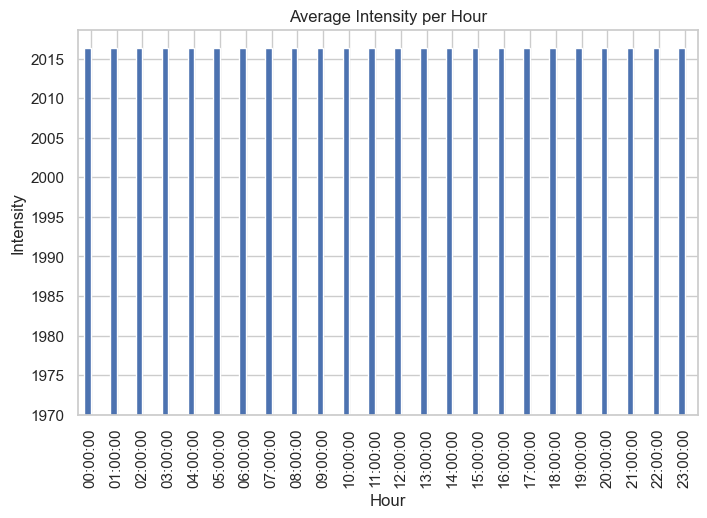

In [19]:
timegroup = df_intensity.ActivityHour.dt.time
intensity = df_intensity.loc[:,['ActivityHour','TotalIntensity']].groupby(timegroup).mean()
intensity.rename(columns = {'TotalIntensity' :'intensity_avg'}, inplace = True)
fig1 = intensity.plot(kind = 'bar', figsize =(8,5), legend = False, \
                   title = 'Average Intensity per Hour').set(xlabel='Hour', ylabel='Intensity')

[Text(0.5, 0, ''), Text(0, 0.5, 'Intensity')]

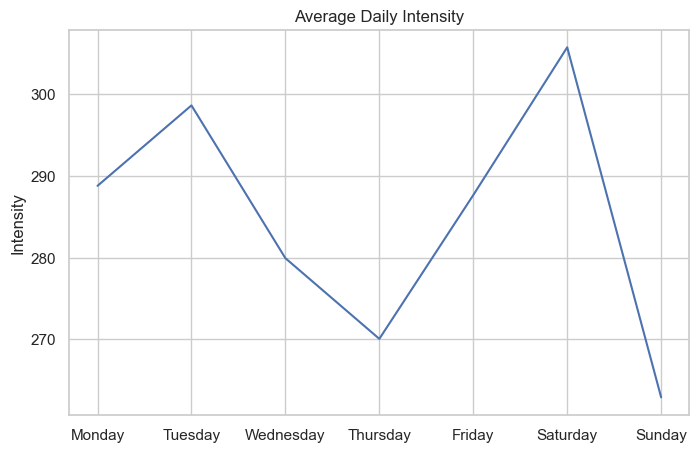

In [20]:
timegroup3 = pd.Grouper(key = 'ActivityHour', freq='D')
daily_intensity = df_intensity.loc[:,['Id', 'ActivityHour', 'TotalIntensity']].groupby(['Id', timegroup3]).sum().reset_index()
daily_intensity.rename(columns = {'ActivityHour' :'Date'}, inplace = True)


day_name = daily_intensity.Date.dt.day_name()
index_order = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_intensity = daily_intensity.groupby(day_name).agg({'TotalIntensity' :'mean'}).reindex(index_order)
avg_intensity.rename(columns = {'TotalIntensity' :'intensity_mean'}, inplace = True)
avg_intensity.index.names = ['Day']

fig2 = avg_intensity.plot(figsize =(8,5), legend = False, title = 'Average Daily Intensity').set(xlabel='', ylabel='Intensity')
fig2

In [21]:
left = df_activity.rename(columns={'ActivityDate' : 'Date'})
right = df_sleep2.rename(columns={'SleepDay' : 'Date'})

df_combined = pd.merge(left, right, how = 'left', on = ['Id', 'Date'])
df_combined2 = pd.merge(df_combined, daily_intensity, how = 'left', on = ['Id', 'Date'])
df_combined2.head()

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TotalIntensity
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1.0,327.0,346.0,429.0
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2.0,384.0,407.0,318.0
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,NaN,NaN,NaN,293.0
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,1.0,412.0,442.0,364.0
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,2.0,340.0,367.0,349.0


TotalMinutesAsleep    1.000000
TotalTimeInBed        0.930422
SedentaryMinutes     -0.601073
Name: TotalMinutesAsleep, dtype: float64

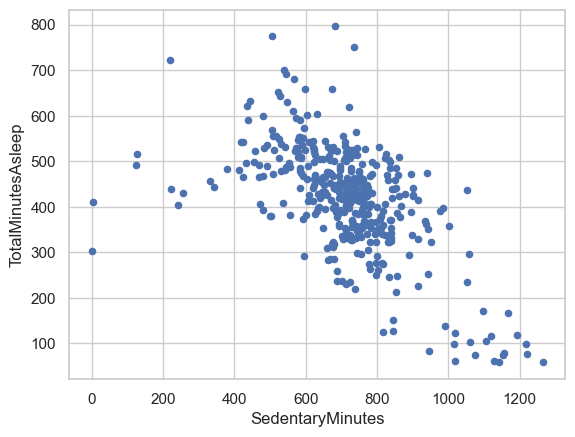

In [22]:
corr = df_combined2.corr()['TotalMinutesAsleep'] 
strong_corr = corr[abs(corr) > 0.5].sort_values(ascending = False)

df_combined2.plot.scatter('SedentaryMinutes','TotalMinutesAsleep')
strong_corr